# General guidelines for building neural networks 

Picking the right network architecture is more of an art than a science, and only practice can help you become an expert neural-network architect. Below we shall work through several examples illustrating different classification and regression tasks. 

Some general guidelines/best practices to keep in mind are the following:

1. The input data has to be in tensor format, whose shape needs to be explicitly specified in the input layer. The terminology for the three key tensor attributes:
  * **rank** or **number of axes**: number of matrix indices, check with .ndim
  * **dimension**: number of entries for each index, check with .shape
  * **data type**: what type of data is contained in the tensor, check with .dtype
2. Data labelling conventions
  * **vector data**: the first axis (axis 0) is the samples axis, so a typical dataset is a 2D tensor of shape (samples, features). Typically processed with **dense** or **fully-connected** layers.
  * **timeseries data**: when one of the variables is time, then a 3D tensor of shape (samples, timesteps, features). By convention, time is on axis 1. Typically processed with **recurrent** or **LSTM** layers. 
  * **images**: 4D tensors of shape (samples, height, width, channels) with 1 channel for grayscale images and 3 channels for color images. Be aware of different conventions (channels-last in TensorFlor and channels-first in Theano). Keras supports both formats. Typically processed with **2D convolution** layers. 
  * **video**: 5D tensors of shape (samples, frames, height, width, channels). 
3. The notion of data batches. Typically, deep-learning models do not process the entire dataset at once; rather the data is broken into small batches formed at random. The three alternatives are:
  * **True SGD**: use a single sample at each iteration (too random)
  * **Batch SGD**: use the full dataset at each iteration (too slow)
  * **Mini-batch SGD**: use a mini-batch of a fixed size (good compromise)
4. There are several variants of SGD which can be used as optimizers. They differ from SGD by taking into account previous weight updates when computing the next weight update, and not just the current state of the system. Many of them use **momentum**, which can increase convergence rate and avoid getting stuck in local minima. The common optimizers are:
  * **RMSprop**: uses an adaptive learning rate instead of treating it as a fixed hyperparameter. It decreases the step for large gradients to avoid exploding, and increases the step for small gradients to avoid stalling. 
  * **SGD with momentum**: <a href="https://distill.pub/2017/momentum/">Why momentum really works</a>
5. Epochs: the number of iterations over **all** of the training data. Also needs to be chosen wisely:
  * if too many, run the risk of overtraining
  * if too few, run the risk of not learning.
6. Topology of the neural network: how the layers are organized.
  * **Sequential**: a linear stack of layers.
  * **Multi-branch networks**, **multihead networks**, etc.




# Example 1: Toy example of <font color="#FA4616">**orange**</font> versus <font color="#003087">**blue**</font> point classification

Go to the <a href="http://playground.tensorflow.org">TensorFlow Playground</a>. There are a total of 6 datasets: 4 for classification and 2 for regression.

* Orange dot = $-1$.
* Blue dot = $+1$.

Feel free to explore the website, play with the settings and have some fun classifying <font color="#FA4616">**ORANGE**</font> versus <font color="#003087">**BLUE**</font>! In particular, you may try the following challenges:

1. Try training with the default layer configuration (4+2). Notice how the neurons in the first layer learn simple patterns while the neurons in the second layer learn to combine those into more complex patterns. Can you successfully classify each of the 4 datasets?
2. In general, the more layers there are, the more complex the patterns can be. Try adding some more layers and see if this expectation holds true.
3. Explore the effect of different activation functions. For example, compare the default tanh with ReLU. Notice that typically ReLU finds the solution faster, but the boundaries are linear, which is due to the shape of the ReLU function.
4. The risk of local minima. Simplify the network architecture to a single layer with just 3 neurons. Train it multiple times (you may also try different activation functions). To reset the weights, click the Reset button to the left of the Play button. Notice how the training time varies a lot, and sometimes it even gets stuck in a local minimum.
5. What happens when the neural network is too small? Which datasets can you classify with only two neurons? With a single neuron?
6. What happens when the neural network is too large? Set the number of neurons to eight and train multiple times. Notice that now for the easy datasets it is consistently fast and never gets stuck in a local minimum. This illustrates an important finding in neural network theory: large neural networks rarely get stuck in local minima, and even when they do, these local minima are almost as good as the global one.
7. The swirl dataset is a tough challenge. A single layer, even with as many as 8 neurons, has a hard time classifying it correctly. One potential solution is feature engineering - feed all 7 properties of the two features into the network.
8. The risk of vanishing gradients in deep networks. Focus again on the swirl dataset and change the architecture to 4 layers with 8 neurons each. Notice that training takes much longer and often gets stuck on plateaus for long periods of time. Also notice that neurons in the highest layers (on the right) tend to evolve faster than the neurons in the lowest layers (on the left). This is a manifestation of the so called **vanishing gradients problem**.  

Further reading:

* <a href="https://cloud.google.com/blog/products/gcp/understanding-neural-networks-with-tensorflow-playground">Understanding neural networks with TensorFlow Playground</a>
* <a href="https://medium.com/@andrewt3000/understanding-tensorflow-playground-c20cdb7a250b">Understanding Deep Learning with TensorFlow playground</a>

# Example 2: Binary classification on the IMDB dataset

**Two-class** classification, or **binary** classification, may be the most widely applied kind of machine learning problem. In this example, we will learn to classify movie reviews into "positive" reviews and "negative" reviews, just based on the text content of the reviews.

## The IMDB dataset

The "IMDB dataset" is a set of 50,000 highly-polarized reviews from the Internet Movie Database. They are split into 25,000 reviews for training and 25,000 reviews for testing, each set consisting of 50% negative and 50% positive reviews. The dataset has already been preprocessed: the reviews (sequences of words) have been turned into sequences of integers, where each integer stands for a specific word in the dictionary.

In [1]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

The argument num_words=10,000 means that we'll only keep the top 10,000 most frequently occurring words in the training data; rare words will be discarded. This allows us to work with vectors of manageable size. 

Let's first explore the data. Each review is a list of word indices (encoding a sequence of words). Each label is 0 (negative review) or 1 (positive review).

In [2]:
train_data

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [3]:
train_labels

array([1, 0, 0, ..., 0, 1, 0])

Check attributes:

In [4]:
train_data.ndim

1

In [5]:
train_data.shape

(25000,)

In [6]:
train_data.dtype

dtype('O')

In [7]:
train_labels.ndim

1

In [8]:
train_labels.shape

(25000,)

In [9]:
train_labels.dtype

dtype('int64')

In order to decode a given review, we have to use the word_index dictionary used to encode the messages:

In [28]:
print("happy birthday = ", word_index.get("happy"), word_index.get("birthday"))

happy birthday =  651 3373


In [30]:
print("Go Gators = ", word_index.get("go"), word_index.get("gators"))

Go Gators =  137 None


and invert it:

In [31]:
# word_index is a dictionary mapping words to an integer index
word_index = imdb.get_word_index()
# We reverse it, mapping integer indices to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [32]:
# We decode the review; note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]]) # 0 was a good review
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [13]:
# We decode the review; note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[2]])  # 2 was a bad review
decoded_review

"? this has to be one of the worst films of the 1990s when my friends i were watching this film being the target audience it was aimed at we just sat watched the first half an hour with our jaws touching the floor at how bad it really was the rest of the time everyone else in the theatre just started talking to each other leaving or generally crying into their popcorn that they actually paid money they had ? working to watch this feeble excuse for a film it must have looked like a great idea on paper but on film it looks like no one in the film has a clue what is going on crap acting crap costumes i can't get across how ? this is to watch save yourself an hour a bit of your life"

## Preparing the data

We can't feed lists of integers into a neural network. We have to convert the input in tensor format. In principle there are 2 ways to do this:

1. Pad the lists so that they have the same length, then turn them into an integer tensor of shape (samples, word_indices), and make sure the input layer can handle this data (embedding layer).
2. One-hot encode the lists into 10,000-dimensional vectors of 0s and 1s, where 0 means the word was present in the review and 1 means the word was absent in the review (the word ordering and frequency information is lost). Note that these vectors will be sparse.

Here we use the second option:

In [33]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, words in enumerate(sequences):
        results[i, words] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [34]:
x_train.shape

(25000, 10000)

Similarly vectorize the labels and convert to float.

In [35]:
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [36]:
y_train[0]

1.0

## Building the network

Let's use a sequential model with one input layer with 16 neurons, one hidden layer with 16 neurons and an output layer with 1 neuron and a sigmoid activation function, so that the output is between 0 and 1. For a binary classification problem an appropriate choice is binary_crossentropy.


In [37]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [38]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

## Fitting and validation

Let us set aside a subset (10000) of the training data for monitoring and validation and use only the remaining 15000 for training.

In [39]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [40]:
x_val.shape

(10000, 10000)

In [41]:
partial_x_train.shape

(15000, 10000)


We will now train our model for 20 epochs (20 iterations over all samples in the x_train and y_train tensors), in mini-batches of 512 samples. At this same time we will monitor loss and accuracy on the 10,000 samples that we set apart. This is done by passing the validation data as the validation_data argument:

In [42]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 56ms/step - loss: 0.5147 - accuracy: 0.7929 - val_loss: 0.3940 - val_accuracy: 0.8731
Epoch 2/20
30/30 [==============================] - 1s 34ms/step - loss: 0.3128 - accuracy: 0.9047 - val_loss: 0.3087 - val_accuracy: 0.8882
Epoch 3/20
30/30 [==============================] - 1s 34ms/step - loss: 0.2306 - accuracy: 0.9231 - val_loss: 0.2818 - val_accuracy: 0.8903
Epoch 4/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1806 - accuracy: 0.9429 - val_loss: 0.2931 - val_accuracy: 0.8836
Epoch 5/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1449 - accuracy: 0.9535 - val_loss: 0.2801 - val_accuracy: 0.8882
Epoch 6/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1144 - accuracy: 0.9643 - val_loss: 0.3229 - val_accuracy: 0.8792
Epoch 7/20
30/30 [==============================] - 1s 33ms/step - loss: 0.0970 - accuracy: 0.9697 - val_loss: 0.3167 - val_accuracy: 0.8841
Epoch 8/20
30

Note that the call to model.fit() returns a History object. This object has a member history, which is a dictionary containing data about everything that happened during training. Let's take a look at it:

In [43]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


It contains 4 entries: one per metric that was being monitored, during training and during validation. Let's use Matplotlib to plot the training and validation loss side by side, as well as the training and validation accuracy:

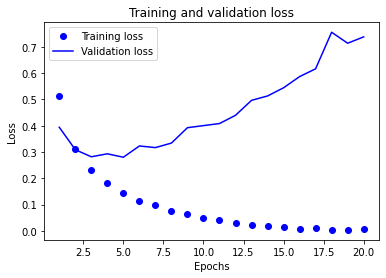

In [44]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

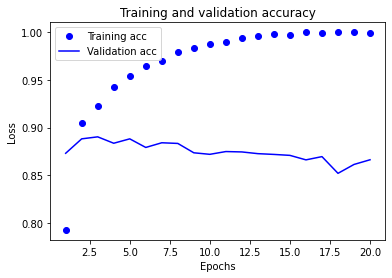

In [45]:
plt.clf()   # clear figure

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

As expected, the training loss monotonically decreases and the training accuracy monotonically increases. However, that is not the case with the validation loss and accuracy, which improve until epoch 3-4 and then start getting worse. This is a sign of overfitting. There are several techniques to mitigate overfitting, which will be illustrated next.



## Further experimentation

You may play around with the network architecture to gain some confidence that our choices were reasonable.
* Try changing the number of hidden layers.
* Try changing the number of neurons.
* Try a different loss function, e.g. mse.
* Try a different activation function, e.g. tanh. 



# How to avoid overfitting 

Overfitting happens in every machine-learning problem - the performance of the model on the held-out validation data peaks after a certain number of epochs and then starts degrading. **Learning how to deal with overfitting is essential to mastering machine learning.**

The fundamental issue in machine learning is the tension between **optimization** and **generalization**. 
* **Optimization** refers to the process of adjusting a model to get the best performance possible on the training data (the "learning" part of "machine learning").
* **Generalization** refers to how well the trained model would perform on data it has never seen before. The goal of the game is to get good generalization, of course, but we do not control generalization; we can only adjust the model based on its training data.

As we saw in the IMDB example above, training proceeds in two stages:
1. **The model is under-fit.** At the beginning of training, optimization and generalization are correlated: the lower the loss on training data, the lower the loss on test data. While this is happening, the model is said to be under-fit: there is still progress to be made; the network hasn't yet modeled all relevant patterns in the training data. 
2. **The model is overfit.** After a certain number of iterations on the training data, generalization stops improving, validation metrics stall then start degrading: the model is then starting to over-fit, i.e. it is starting to learn patterns that are specific to the training data but that are misleading or irrelevant when it comes to new data.

The four most common ways to deal with overfitting are
1. Increase the amount of training data (or if not possible, reduce the number of epochs).
2. Reduce the capacity of the network.
3. Add weight regularization.
4. Add dropout.


## Stop the training process early enough (or get more training data)

We observed that the validation loss started to increase after 4 epochs, so we can simply stop at 4 epochs. We can now train a new network from scratch for 4 epochs, **using the full training dataset**:

In [46]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 1s 27ms/step - loss: 0.4583 - accuracy: 0.8128
Epoch 2/4
49/49 [==============================] - 1s 27ms/step - loss: 0.2597 - accuracy: 0.9111
Epoch 3/4
49/49 [==============================] - 1s 27ms/step - loss: 0.1998 - accuracy: 0.9295
Epoch 4/4
782/782 [==============================] - 1s 1ms/step - loss: 0.2931 - accuracy: 0.8839


In [47]:
results

[0.29312217235565186, 0.8839200139045715]

This simple approach results in an accuracy of 88%.

Let us use the model to predict the likelihood of a review being positive or negative:

In [48]:
model.predict(x_test)

array([[0.15820348],
       [0.9993376 ],
       [0.7361716 ],
       ...,
       [0.0974142 ],
       [0.04630074],
       [0.6368224 ]], dtype=float32)

In [49]:
model.predict(x_test)[0:10]   # Look at the first ten predictions

array([[0.15820348],
       [0.9993376 ],
       [0.7361716 ],
       [0.7789465 ],
       [0.94997275],
       [0.7293724 ],
       [0.999508  ],
       [0.00718078],
       [0.9629725 ],
       [0.9903214 ]], dtype=float32)

In [50]:
model.predict(x_test)[-10:-1]  # Look at the last ten predictions

array([[6.3345486e-01],
       [1.6143918e-04],
       [9.9713922e-01],
       [3.8448629e-01],
       [9.8947889e-01],
       [9.9907756e-01],
       [4.9503645e-01],
       [9.7414196e-02],
       [4.6300739e-02]], dtype=float32)

In [52]:
# We decode the review; note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in test_data[1]])  # 1 should be a good review
decoded_review

"? this film requires a lot of patience because it focuses on mood and character development the plot is very simple and many of the scenes take place on the same set in frances ? the sandy dennis character apartment but the film builds to a disturbing climax br br the characters create an atmosphere ? with sexual tension and psychological ? it's very interesting that robert altman directed this considering the style and structure of his other films still the trademark altman audio style is evident here and there i think what really makes this film work is the brilliant performance by sandy dennis it's definitely one of her darker characters but she plays it so perfectly and convincingly that it's scary michael burns does a good job as the mute young man regular altman player michael murphy has a small part the ? moody set fits the content of the story very well in short this movie is a powerful study of loneliness sexual ? and desperation be patient ? up the atmosphere and pay attenti

In [53]:
# We decode the review; note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in test_data[7]])  # 7 should be a bad review
decoded_review

'? the ? richard ? dog is ? to ? joan fontaine dog however when ? bing crosby arrives in town to sell a record player to the emperor his dog is attacked by ? dog after a revenge attack where ? is ? from town a ? insists that ? dog must confront dog so that she can overcome her ? fears this is arranged and the dogs fall in love so do ? and ? the rest of the film passes by with romance and at the end ? dog gives birth but who is the father br br the dog story is the very weak vehicle that is used to try and create a story between humans its a terrible storyline there are 3 main musical pieces all of which are rubbish bad songs and dreadful choreography its just an extremely boring film bing has too many words in each sentence and delivers them in an almost irritating manner its not funny ever but its meant to be bing and joan have done much better than this'

In [54]:
# We decode the review; note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in test_data[0]])  # 0 is probably bad
decoded_review

"? please give this one a miss br br ? ? and the rest of the cast rendered terrible performances the show is flat flat flat br br i don't know how michael madison could have allowed this one on his plate he almost seemed to know this wasn't going to work out and his performance was quite ? so all you madison fans give this a miss"

In [55]:
# We decode the review; note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in test_data[-3]])  # -3 was inconclusive
decoded_review

"? i suppose that to say this is an all out terrible movie would be unfair but it's pretty bad the sub disney storyline involves dogs playing soccer and falling in love ? how cute the acting isn't bad but definitely could be better especially that of young canadian actor kevin ? who during the whole movie looks embarrassed like he doesn't even want to be there anyway kids will love it but parents beware"

In [56]:
# We decode the review; note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in test_data[-4]])  # -4 is great
decoded_review

"? the largest crowd to ever see a wrestling event in the us took place at ? 6 over ? 000 people showed up to break the rolling stones ? record and this event didn't disappoint at all maybe the biggest match of all time took place as the immortal hulk ? his world title against the ultimate warrior there are over 12 matches in all so you get tons of action"

## Reduce the network's capacity

The simplest way to prevent overfitting is to reduce the size of the model, i.e. the number of learnable parameters in the model (which in turn is determined by the number of layers and the number of units per layer). In deep learning, the number of learnable parameters in a model is often referred to as the model's **capacity**. For optimal performance, you need to find the right balance between "too much capacity" and "not enough capacity":

1. **Too much capacity.** Intuitively, a model with more parameters will have more "memorization capacity" and therefore will be able to easily learn a perfect dictionary-like mapping between training samples and their targets, a mapping without any generalization power. Always keep this in mind: deep learning models tend to be good at fitting to the training data, but the real challenge is generalization, not fitting.
2. **Insufficient capacity.** On the other hand, if the network has limited memorization resources, it will not be able to learn this mapping as easily, and thus, in order to minimize its loss, it will have to resort to learning compressed representations that have predictive power regarding the targets -- precisely the type of representations that we are interested in. At the same time, keep in mind that you should be using models that have enough parameters that they won't be underfitting: your model shouldn't be starved for memorization resources. 

Unfortunately, **there is no magical formula** to determine what the right number of layers is, or what the right size for each layer is. You will have to evaluate an array of different architectures (on your validation set, not on your test set, of course) in order to find the right model size for your data. The general workflow to find an appropriate model size is to start with relatively few layers and parameters, and start increasing the size of the layers or adding new layers until you see diminishing returns with regard to the validation loss.

Let's illustrate with the IMDB example. First reproduce the original model with 16 neurons per layer.

In [57]:
original_model = models.Sequential()
original_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
original_model.add(layers.Dense(16, activation='relu'))
original_model.add(layers.Dense(1, activation='sigmoid'))

original_model.compile(optimizer='rmsprop',
                       loss='binary_crossentropy',
                       metrics=['acc'])

Now create a new smaller network with lower capacity (4 neurons per layer instead of 16):

In [58]:
smaller_model = models.Sequential()
smaller_model.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
smaller_model.add(layers.Dense(4, activation='relu'))
smaller_model.add(layers.Dense(1, activation='sigmoid'))

smaller_model.compile(optimizer='rmsprop',
                      loss='binary_crossentropy',
                      metrics=['acc'])

Then train both models:

In [59]:
original_hist = original_model.fit(x_train, y_train,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 2s 48ms/step - loss: 0.4713 - acc: 0.8205 - val_loss: 0.3462 - val_acc: 0.8812
Epoch 2/20
49/49 [==============================] - 2s 38ms/step - loss: 0.2663 - acc: 0.9075 - val_loss: 0.2928 - val_acc: 0.8852
Epoch 3/20
49/49 [==============================] - 2s 38ms/step - loss: 0.2057 - acc: 0.9270 - val_loss: 0.2981 - val_acc: 0.8799
Epoch 4/20
49/49 [==============================] - 2s 38ms/step - loss: 0.1697 - acc: 0.9384 - val_loss: 0.3241 - val_acc: 0.8723
Epoch 5/20
49/49 [==============================] - 2s 38ms/step - loss: 0.1477 - acc: 0.9480 - val_loss: 0.3068 - val_acc: 0.8806
Epoch 6/20
49/49 [==============================] - 2s 39ms/step - loss: 0.1305 - acc: 0.9540 - val_loss: 0.3272 - val_acc: 0.8774
Epoch 7/20
49/49 [==============================] - 2s 38ms/step - loss: 0.1151 - acc: 0.9609 - val_loss: 0.3692 - val_acc: 0.8691
Epoch 8/20
49/49 [==============================] - 2s 38ms/step - loss: 0.1050 - a

In [60]:
smaller_model_hist = smaller_model.fit(x_train, y_train,
                                       epochs=20,
                                       batch_size=512,
                                       validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 2s 43ms/step - loss: 0.5167 - acc: 0.7951 - val_loss: 0.4165 - val_acc: 0.8560
Epoch 2/20
49/49 [==============================] - 2s 33ms/step - loss: 0.3268 - acc: 0.8982 - val_loss: 0.3230 - val_acc: 0.8826
Epoch 3/20
49/49 [==============================] - 2s 33ms/step - loss: 0.2502 - acc: 0.9177 - val_loss: 0.2987 - val_acc: 0.8836
Epoch 4/20
49/49 [==============================] - 2s 32ms/step - loss: 0.2083 - acc: 0.9304 - val_loss: 0.2844 - val_acc: 0.8865
Epoch 5/20
49/49 [==============================] - 2s 33ms/step - loss: 0.1830 - acc: 0.9380 - val_loss: 0.2811 - val_acc: 0.8870
Epoch 6/20
49/49 [==============================] - 2s 34ms/step - loss: 0.1630 - acc: 0.9450 - val_loss: 0.2888 - val_acc: 0.8839
Epoch 7/20
49/49 [==============================] - 2s 33ms/step - loss: 0.1485 - acc: 0.9495 - val_loss: 0.3025 - val_acc: 0.8812
Epoch 8/20
49/49 [==============================] - 2s 33ms/step - loss: 0.1358 - a

In [61]:
original_val_loss = original_hist.history['val_loss']
smaller_model_val_loss = smaller_model_hist.history['val_loss']

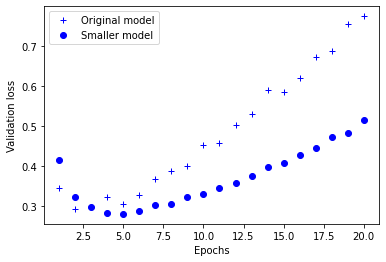

In [62]:
import matplotlib.pyplot as plt

# b+ is for "blue cross"
plt.plot(epochs, original_val_loss, 'b+', label='Original model')
# "bo" is for "blue dot"
plt.plot(epochs, smaller_model_val_loss, 'bo', label='Smaller model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()


The smaller network starts overfitting much later, and its performance degrades more slowly once it starts overfitting.

## Adding weight regularization

Another way to simplify the model (besides reducing the number of parameters) is to demand that the distribution of parameter values has less entropy. A common way to do this is to force the weights to take only **small** values, which makes the distribution of weights more **regular**. This is called weight regularization and it comes in two flavors:
* **L1 regularization**. Limit the absolute values of the weight coefficients.
* **L2 regularization** [also referred to as **weight decay**]. Limit the squares of the weight coefficients.

Let's do one example with L2 regularization:

In [63]:
from keras import regularizers

l2_model = models.Sequential()
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu', input_shape=(10000,)))
l2_model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),
                          activation='relu'))
l2_model.add(layers.Dense(1, activation='sigmoid'))

Here l2(0.001) means that every coefficient in the weight matrix of the layer will add 0.001 * weight_coefficient_value to the total loss of the network. Note that because this penalty is only added at training time, the loss for this network will be much higher at training than at test time.

In [64]:
l2_model.compile(optimizer='rmsprop',
                 loss='binary_crossentropy',
                 metrics=['acc'])

In [65]:
l2_model_hist = l2_model.fit(x_train, y_train,
                             epochs=20,
                             batch_size=512,
                             validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 2s 50ms/step - loss: 0.4857 - acc: 0.8192 - val_loss: 0.4193 - val_acc: 0.8415
Epoch 2/20
49/49 [==============================] - 2s 38ms/step - loss: 0.3111 - acc: 0.9055 - val_loss: 0.3436 - val_acc: 0.8834
Epoch 3/20
49/49 [==============================] - 2s 39ms/step - loss: 0.2688 - acc: 0.9206 - val_loss: 0.4268 - val_acc: 0.8438
Epoch 4/20
49/49 [==============================] - 2s 38ms/step - loss: 0.2471 - acc: 0.9298 - val_loss: 0.4026 - val_acc: 0.8580
Epoch 5/20
49/49 [==============================] - 2s 39ms/step - loss: 0.2405 - acc: 0.9330 - val_loss: 0.3465 - val_acc: 0.8837
Epoch 6/20
49/49 [==============================] - 2s 39ms/step - loss: 0.2260 - acc: 0.9389 - val_loss: 0.3602 - val_acc: 0.8806
Epoch 7/20
49/49 [==============================] - 2s 39ms/step - loss: 0.2232 - acc: 0.9400 - val_loss: 0.4135 - val_acc: 0.8628
Epoch 8/20
49/49 [==============================] - 2s 39ms/step - loss: 0.2185 - a

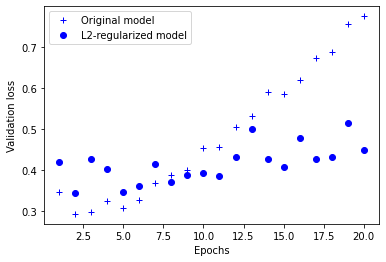

In [66]:
l2_model_val_loss = l2_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l2_model_val_loss, 'bo', label='L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

The model with L2 regularization (dots) has become much more resistant to overfitting than the reference model (crosses), even though both models have the same number of parameters.

As alternatives to L2 regularization, you could use one of the following Keras weight regularizers:

In [67]:
from keras import regularizers

# L1 regularization
regularizers.l1(0.001)

# L1 and L2 regularization at the same time
regularizers.l1_l2(l1=0.001, l2=0.001)

## Adding dropout

**Dropout** is one of the most effective and most commonly used regularization techniques for neural networks, developed by Geoff Hinton and his students at the University of Toronto. Geoff Hinton has said that he was inspired, among other things, by a fraud prevention mechanism used by banks -- in his own words: "I went to my bank. The tellers kept changing and I asked one of them why. He said he didn’t know but they got moved around a lot. I figured it must be because it would require cooperation between employees to successfully defraud the bank. This made me realize that randomly removing a different subset of neurons on each example would prevent conspiracies and thus reduce overfitting".

**Rough explanation**: Dropout, applied to a layer, consists of randomly "dropping out" (i.e. setting to zero) a number of output features of the layer during training. Let's say a given layer would normally have returned a vector [0.2, 0.5, 1.3, 0.8, 1.1] for a given input sample during training; after applying dropout, this vector will have a few zero entries distributed at random, e.g. [0, 0.5, 1.3, 0, 1.1]. The "dropout rate" is the fraction of the features that are being zeroed-out; it is usually set between 0.2 and 0.5. At test time, no units are dropped out, and instead the layer's output values are scaled down by a factor equal to the dropout rate, so as to balance for the fact that more units are active than at training time.

**Why would this trick help?** The core idea is that introducing noise in the output values of a layer can break up happenstance patterns that are not significant (what Hinton refers to as "conspiracies"), which the network would start memorizing if no noise was present.

Additional reading: <a href="https://machinelearningmastery.com/dropout-for-regularizing-deep-neural-networks/">https://machinelearningmastery.com/dropout-for-regularizing-deep-neural-networks/</a>

In Keras you can introduce dropout in a network via the Dropout layer, which gets applied to the output of layer right before it, e.g.:

In [68]:
model.add(layers.Dropout(0.5))

Let's add two Dropout layers in our IMDB network to see how well they do at reducing overfitting:

In [69]:
dpt_model = models.Sequential()
dpt_model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(16, activation='relu'))
dpt_model.add(layers.Dropout(0.5))
dpt_model.add(layers.Dense(1, activation='sigmoid'))

dpt_model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['acc'])

In [70]:
dpt_model_hist = dpt_model.fit(x_train, y_train,
                               epochs=20,
                               batch_size=512,
                               validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 3s 61ms/step - loss: 0.6054 - acc: 0.6638 - val_loss: 0.4662 - val_acc: 0.8590
Epoch 2/20
49/49 [==============================] - 2s 38ms/step - loss: 0.4567 - acc: 0.7964 - val_loss: 0.3458 - val_acc: 0.8805
Epoch 3/20
49/49 [==============================] - 2s 38ms/step - loss: 0.3735 - acc: 0.8520 - val_loss: 0.3015 - val_acc: 0.8836
Epoch 4/20
49/49 [==============================] - 2s 38ms/step - loss: 0.3158 - acc: 0.8827 - val_loss: 0.2781 - val_acc: 0.8886
Epoch 5/20
49/49 [==============================] - 2s 38ms/step - loss: 0.2793 - acc: 0.8974 - val_loss: 0.2832 - val_acc: 0.8850
Epoch 6/20
49/49 [==============================] - 2s 39ms/step - loss: 0.2493 - acc: 0.9124 - val_loss: 0.2964 - val_acc: 0.8875
Epoch 7/20
49/49 [==============================] - 2s 38ms/step - loss: 0.2242 - acc: 0.9223 - val_loss: 0.2955 - val_acc: 0.8862
Epoch 8/20
49/49 [==============================] - 2s 38ms/step - loss: 0.2026 - a

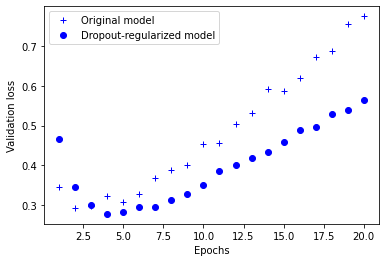

In [71]:
dpt_model_val_loss = dpt_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, dpt_model_val_loss, 'bo', label='Dropout-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()